In [2]:
import pandas as pd

In [5]:
cars_df = pd.read_csv('./data/Auto.csv')

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


## horse power is infereed as a object , so there might be not number values

In [8]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
cars_df[-cars_df.horsepower.str.isnumeric()] #- mean not , first convert to str then apply isnumberic

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [13]:
cars_df['horsepower'] = pd.to_numeric(cars_df['horsepower'])

ValueError: Unable to parse string "?" at position 32

In [15]:
cars_df['horsepower'] = pd.to_numeric(cars_df['horsepower'],errors = 'coerce')

In [17]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


# Exploratory Analysis

In [19]:
cars_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [21]:
cars_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

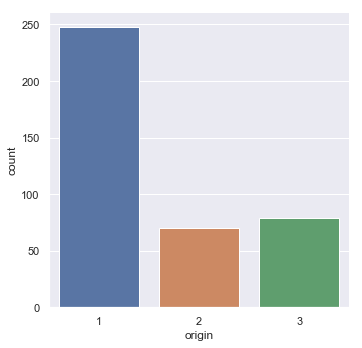

In [25]:
sns.catplot(data = cars_df,
               x = 'origin',
           kind = 'count' )

In [27]:
cars_df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

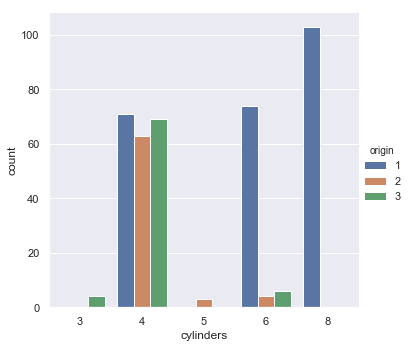

In [29]:
sns.catplot(data = cars_df,
            x = 'cylinders',
           hue = 'origin',
           kind = 'count')

## Fuel efficiency

In [31]:
cars_4_df = cars_df[cars_df.cylinders == 4]

In [51]:
american_mpg= cars_4_df[cars_4_df.origin == 1]['mpg'].dropna()
japnese_mpg= cars_4_df[cars_4_df.origin == 3]['mpg'].dropna()

In [35]:
dir() - List of all memory objects #del will delete the object

SyntaxError: invalid syntax (<ipython-input-35-72f747b0807a>, line 1)

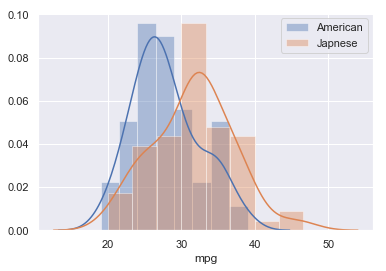

In [52]:
sns.distplot(american_mpg ,label = 'American')
sns.distplot(japnese_mpg ,label = 'Japnese');
plt.legend();

In [47]:
american_mpg.isna().sum()

0

In [ ]:
## StatisticalTests

In [48]:
from scipy import stats

In [53]:
stats.ttest_ind(american_mpg,japnese_mpg)

Ttest_indResult(statistic=-4.35909999590582, pvalue=2.5341001696451143e-05)

In [56]:
american_mpg.mean()

27.908450704225356

In [57]:
american_mpg.std()

4.544753536579239

In [58]:
stats.norm.interval(.95,american_mpg.mean(),american_mpg.std())

(19.00089745391901, 36.8160039545317)

In [60]:
## 95 percent of american cars mpg lies between 19 and 36

In [62]:
stats.norm.interval(.5,american_mpg.mean(),american_mpg.std())

(24.843061026635265, 30.973840381815446)

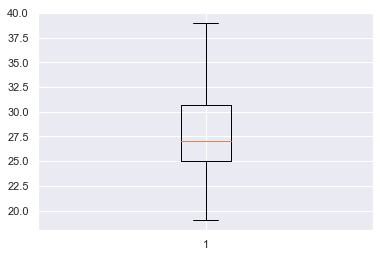

In [67]:
box = plt.boxplot(american_mpg)

In [68]:
[item.get_ydata()[0] for item in box['caps']]

[19.0, 39.0]

In [69]:
[item.get_ydata()[0] for item in box['whiskers']]

[25.0, 30.7]

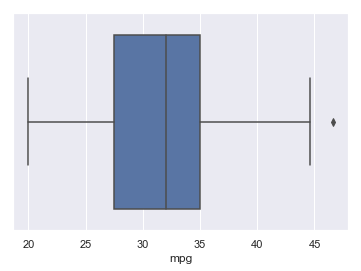

In [66]:
sns.boxplot(japnese_mpg)

In [71]:
#List COmprehension
a = [1,2,3]
b = [x*x for x in a]
b

[1, 4, 9]

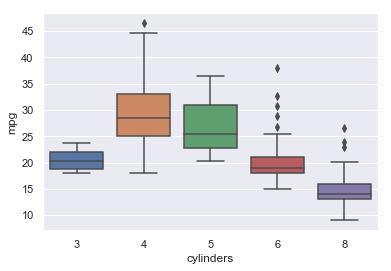

In [74]:
sns.boxplot(data = cars_df,x = 'cylinders',y = 'mpg')

In [75]:
cars_df[cars_df.cylinders == 6].sort_values('mpg',
                                           ascending = False)[0:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
386,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,2,volvo diesel
306,28.8,6,173.0,115.0,2595,11.3,79,1,chevrolet citation


## Weight vs mpg 

Text(0, 0.5, 'mpg')

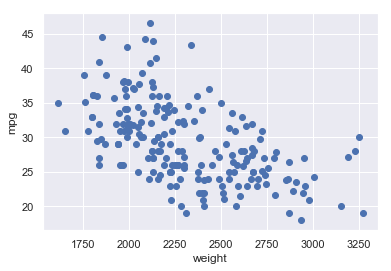

In [79]:
plt.scatter(cars_4_df.weight,cars_4_df.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')

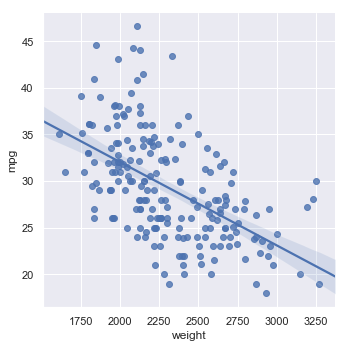

In [81]:
sns.lmplot(data = cars_4_df,
            x = 'weight',
              y = 'mpg')

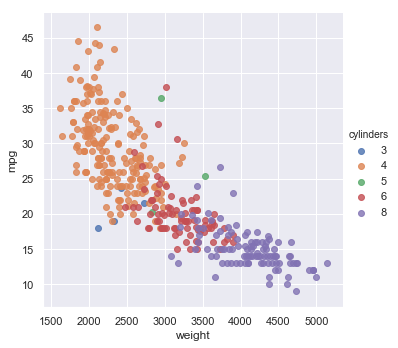

In [84]:
sns.lmplot(data = cars_df,
            x = 'weight',
              y = 'mpg',
               hue = 'cylinders',
          fit_reg = False)  #3rd variable shud be categorical

In [86]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


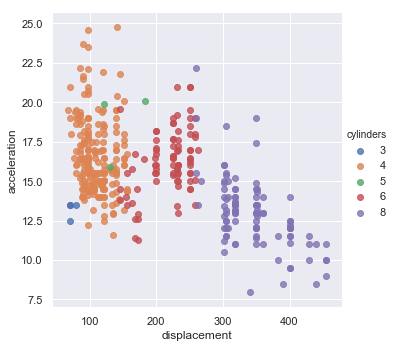

In [92]:
sns.lmplot(data = cars_df,x = 'displacement'
           , y = 'acceleration',
           hue = 'cylinders',
          fit_reg = False)

## Heat Map


In [95]:
cars_df_vl = cars_df[['mpg','acceleration','weight','horsepower']]

In [97]:
cars_df_vl = cars_df_vl.dropna()

In [100]:
corr_mat = cars_df_vl.corr()

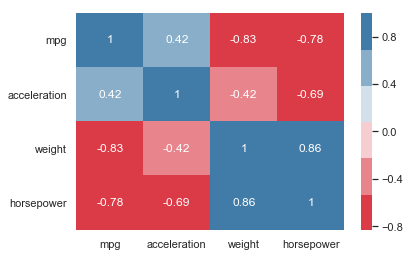

In [102]:
sns.heatmap(corr_mat,
            annot = True,
            cmap=sns.diverging_palette(10,240) )

In [104]:
sns.__version__

'0.9.0'

In [110]:
matplotlib.__version__

'3.0.3'

In [112]:
avg_mpg = (cars_4_df
           .groupby('year')['mpg']
           .mean()
           .reset_index())

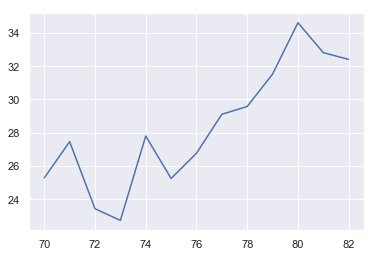

In [113]:
plt.plot(avg_mpg.year,avg_mpg.mpg)